In [1]:
import os
import tensorflow as tf
import numpy as np
from IPython.display import display, Image
import glob
import random
import shutil

In [2]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [24]:
data=os.path.join("./data_dog_cat/train/cat")

In [25]:
data_list=os.listdir(data)

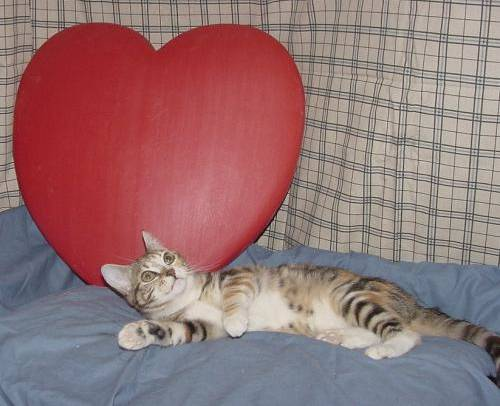

In [31]:
display(Image("./data_dog_cat/train/cat/{}".format(data_list[np.random.randint(100)])))

In [6]:
os.chdir('./data_dog_cat')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../')

In [7]:
os.getcwd()

'D:\\VisualStudioCode\\Python\\deep_learning\\basic\\dog_vs_cat'

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,MaxPooling2D

In [9]:
# model =Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(units=2, activation='softmax')
# ])

model=tf.keras.models.Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(350,350,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 84, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen=ImageDataGenerator(rescale=1/225)
validation_datagen=ImageDataGenerator(rescale=1/225)

In [14]:
train_generator=train_datagen.flow_from_directory("./data_dog_cat/train",
                                                  target_size=(350,350),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                  classes=["cat","dog"]
                                          
)

Found 24700 images belonging to 2 classes.


In [15]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [16]:
validation_generator=validation_datagen.flow_from_directory("./data_dog_cat/valid",
                                                  target_size=(350,350),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                  classes=["cat","dog"]
                                          
)

Found 200 images belonging to 2 classes.


In [17]:
model.fit(train_generator,validation_data=validation_generator,epochs=4)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 772 steps, validate for 7 steps
Epoch 1/4
772/772 [==============================] - 760s 984ms/step - loss: 0.6857 - accuracy: 0.6228 - val_loss: 0.5978 - val_accuracy: 0.7000
Epoch 2/4
772/772 [==============================] - 269s 349ms/step - loss: 0.5381 - accuracy: 0.7277 - val_loss: 0.5527 - val_accuracy: 0.7400
Epoch 3/4
772/772 [==============================] - 291s 377ms/step - loss: 0.3845 - accuracy: 0.8291 - val_loss: 0.5345 - val_accuracy: 0.7400
Epoch 4/4
772/772 [==============================] - 292s 379ms/step - loss: 0.1615 - accuracy: 0.9357 - val_loss: 0.6918 - val_accuracy: 0.7700


[0.]
Model predicted input as a cat
[[0.]]


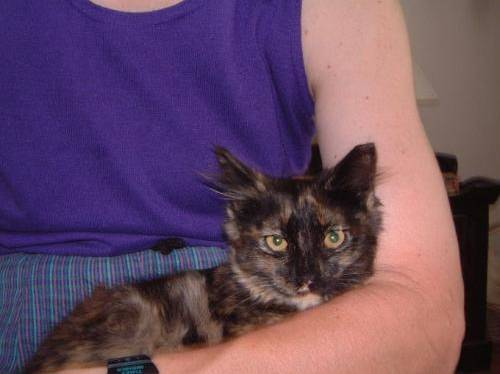

In [41]:
from tensorflow.keras.preprocessing import image
# list_dog=os.listdir("./data_dog_cat/test/dog/")
# error_list=[]
# for i in list_dog:
path ="./data_dog_cat/train/cat/{}".format('cat.3252.jpg')
img = image.load_img(path, target_size=(350,350,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])
if classes[0][0]>0.5:
    print("Model predicted input as a dog")
    
else:
    print("Model predicted input as a cat")
    #error_list.append(i)

print(classes)
display(Image(path))
